# KNN (K-Nearest Neighbors classifier) Implementation

In [1]:
import numpy as np

class KNearestNeighbors:
    def __init__(self, k=3):
        """
        K-Nearest Neighbors classifier.

        Parameters:
        k (int): Number of neighbors to consider.
        """
        self.k = k

    def _euclidean_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two points.

        Parameters:
        x1, x2 (array-like): Data points.

        Returns:
        float: Euclidean distance.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def fit(self, X, y):
        """
        Store the training data.

        Parameters:
        X (array-like): Feature matrix of shape (n_samples, n_features).
        y (array-like): Target vector of shape (n_samples,).
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Predict the class labels for the input data.

        Parameters:
        X (array-like): Feature matrix of shape (n_samples, n_features).

        Returns:
        array-like: Predicted class labels.
        """
        return [self._predict(x) for x in X]

    def _predict(self, x):
        """
        Predict the class label for a single input.

        Parameters:
        x (array-like): Single data point.

        Returns:
        int: Predicted class label.
        """
        # Compute distances between x and all training samples
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get the indices of the k nearest samples
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]

        # Return the most common class label among the k nearest neighbors
        most_common_label = np.bincount(k_nearest_labels).argmax()
        return most_common_label


# KNN test on IRIS dataset

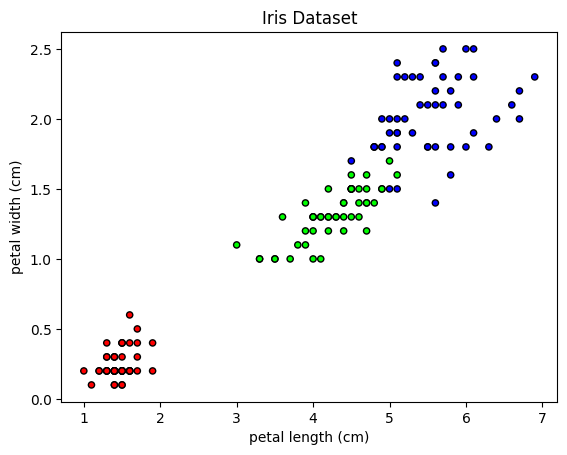

Predictions: [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]
Accuracy: 1.00


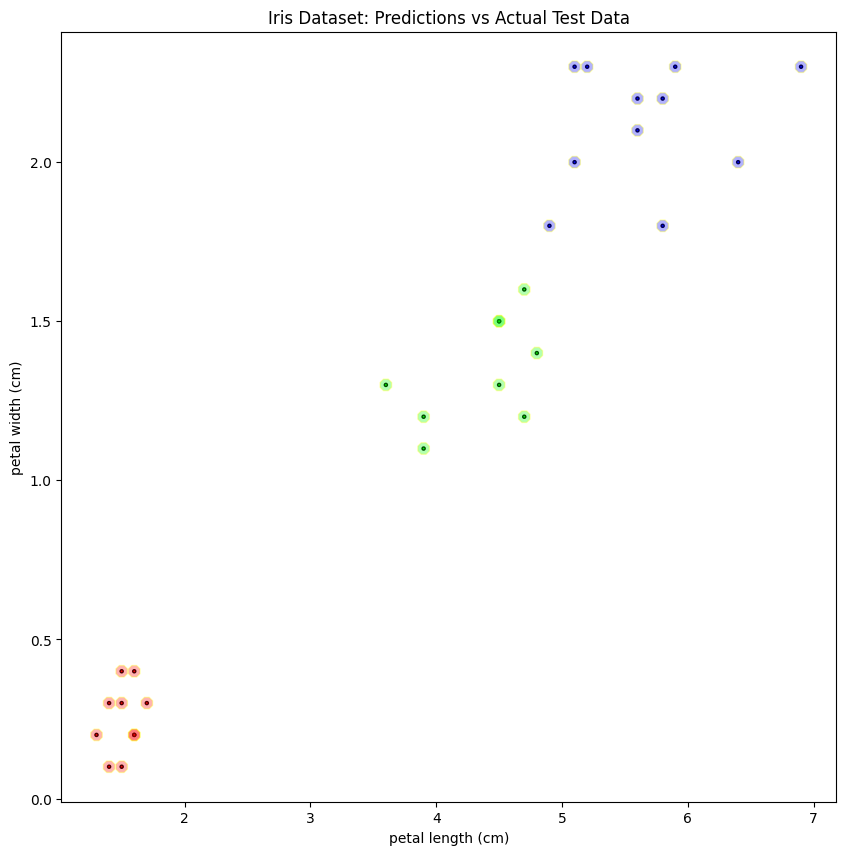

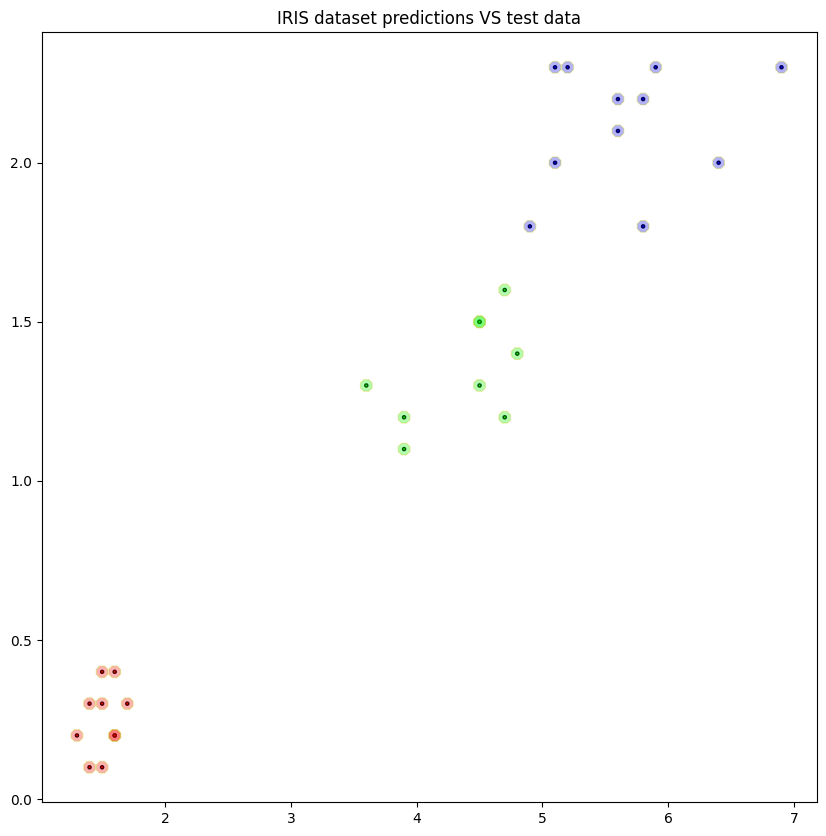

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def accuracy(y_true, y_pred):
    """
    Calculate the accuracy of the predictions.

    Parameters:
    y_true (array-like): True class labels.
    y_pred (array-like): Predicted class labels.

    Returns:
    float: Accuracy score.
    """
    return np.sum(y_true == y_pred) / len(y_true)

# Load the Iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the dataset
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure()
plt.title('Iris Dataset')
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

# Initialize and train the K-Nearest Neighbors classifier
knn_classifier = KNearestNeighbors(k=5)
knn_classifier.fit(X_train, y_train)

# Predict the target values for the test set
predictions = knn_classifier.predict(X_test)
print(f"Predictions: {predictions}")

# Calculate and print the accuracy
accuracy_score = accuracy(y_test, predictions)
print(f"Accuracy: {accuracy_score:.2f}")

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 10))
plt.title('Iris Dataset: Predictions vs Actual Test Data')
plt.scatter(X_test[:, 2], X_test[:, 3], c=predictions, cmap=cmap, edgecolor='k', s=20, marker='.')
plt.scatter(X_test[:, 2], X_test[:, 3], c=y_test, cmap=cmap, edgecolor='yellow', s=80, marker='8', alpha=0.3)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()


plt.figure(figsize=(10, 10))
plt.title('IRIS dataset predictions VS test data')
plt.scatter(X_test[:,2],X_test[:,3],c=predictions, cmap=cmap, edgecolor='k', s=20, marker='.')
plt.scatter(X_test[:,2],X_test[:,3],c=y_test, cmap=cmap, edgecolor='y', s=80, marker='8', alpha=0.3)
plt.show()
